In [1]:
using DifferentialEquations
using Plots
using ParameterizedFunctions
using Latexify

f = @ode_def epimodel begin
    dS = B - (μ + ρ) * S + (σ + μ) * (2 * SS + SI + SR)
    dI = -(μ + ρ + δ) * I + (σ + μ) * (2 * II + SI + IR)
    dR = δ * I - (μ + ρ) * R + (σ + μ) * (2 * RR + SR + IR)
    dSS = 0.5 * ρ * S^2 / N - (σ + 2 * μ) * SS
    dSI = ρ * (1 - h) * S * I / N - (σ + ϕ * h + 2 * μ + δ) * SI
    dII = 0.5 * ρ * I^2 / N + ρ * h * S * I / N + ϕ * h * SI - (σ + 2 * μ + δ) * II
    dSR = ρ * S * R / N + δ * SI - (σ + 2 * μ) * SR
    dIR = ρ * I * R / N + δ * II - (σ + 2 * μ + δ) * IR
    dRR = 0.5 * ρ * I^2 / N + δ * IR - (σ + 2 * μ) * RR
    dH = 2 * ρ * h * S * I / N + ρ * (1 - h) * S * I / N
end B μ ρ σ δ h ϕ N

latexify(f)

"\\begin{align}\n\\frac{dS(t)}{dt} =& B + \\left( \\mu + \\sigma \\right) \\left( 2 \\mathrm{SS}\\left( t \\right) + \\mathrm{SI}\\left( t \\right) + \\mathrm{SR}\\left( t \\right) \\right) - \\left( \\mu + \\rho \\right) S\\left( t \\right) \\\\\n\\frac{dI(t)}{dt} =& \\left( \\mu + \\sigma \\right) \\l" ⋯ 1369 bytes ⋯ "\\left( I\\left( t \\right) \\right)^{2} \\rho}{N} - \\left( \\sigma + 2 \\mu \\right) \\mathrm{RR}\\left( t \\right) \\\\\n\\frac{dH(t)}{dt} =& \\frac{\\rho \\left( 1 - h \\right) I\\left( t \\right) S\\left( t \\right)}{N} + \\frac{2 h \\rho I\\left( t \\right) S\\left( t \\right)}{N}\n\\end{align}\n"

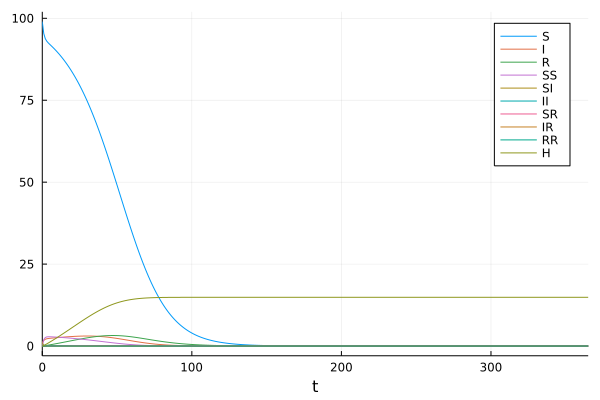

In [38]:
using DifferentialEquations
using Plots
using ParameterizedFunctions
using Latexify
f = @ode_def epimodel begin
    dS = B - (μ + ρ) * S + (σ + μ) * (2 * SS + SI + SR)
    dI = -(μ + ρ + δ) * I + (σ + μ) * (2 * II + SI + IR)
    dR = δ * I - (μ + ρ) * R + (σ + μ) * (2 * RR + SR + IR)
    dSS = 0.5 * ρ * S^2 / N - (σ + 2 * μ) * SS
    dSI = ρ * (1 - h) * S * I / N - (σ + ϕ * h + 2 * μ + δ) * SI
    dII = 0.5 * ρ * I^2 / N + ρ * h * S * I / N + ϕ * h * SI - (σ + 2 * μ + δ) * II
    dSR = ρ * S * R / N + δ * SI - (σ + 2 * μ) * SR
    dIR = ρ * I * R / N + δ * II - (σ + 2 * μ + δ) * IR
    dRR = 0.5 * ρ * I^2 / N + δ * IR - (σ + 2 * μ) * RR
    dH = 2 * ρ * h * S * I / N + ρ * (1 - h) * S * I / N
end B μ ρ σ δ h ϕ N

function epimodel(du, u, p, t)
    B, μ, ρ, σ, δ, h, ϕ, N= p
    S, I, R, SS, SI, II, SR, IR, RR, H = u
    du[1] = B - (μ + ρ) * S + (σ + μ) * (2 * SS + SI + SR)
    du[2] = -(μ + ρ + δ) * I + (σ + μ) * (2 * II + SI + IR)
    du[3] = δ * I - (μ + ρ) * R + (σ + μ) * (2 * RR + SR + IR)
    du[4] = 0.5 * ρ * S^2 / N - (σ + 2 * μ) * SS
    du[5] = ρ * (1 - h) * S * I / N - (σ + ϕ * h + 2 * μ + δ) * SI
    du[6] = 0.5 * ρ * I^2 / N + ρ * h * S * I / N + ϕ * h * SI - (σ + 2 * μ + δ) * II
    du[7] = ρ * S * R / N + δ * SI - (σ + 2 * μ) * SR
    du[8] = ρ * I * R / N + δ * II - (σ + 2 * μ + δ) * IR
    du[9] = 0.5 * ρ * I^2 / N + δ * IR - (σ + 2 * μ) * RR
    du[10] = 2 * ρ * h * S * I / N + ρ * (1 - h) * S * I / N
end

N = 100
u0 = [N - 1, 1, 0, 0, 1, 0, 0, 0, 0, 0]
tmax = 365
tspan = (0, tmax)
B = 0
μ = 0
ρ = 1 / 15
σ = 1
δ = 1 / 30
h = 0.9
ϕ = 1
p0 = [B, μ, ρ, σ, δ, h, ϕ, N]
odeprob1 = ODEProblem(f, u0, tspan, p0)
odeprob2 = ODEProblem(epimodel, u0, tspan, p0)
sol1 = solve(odeprob1, Vern7(), saveat=0:1:tmax)
plot(sol1)

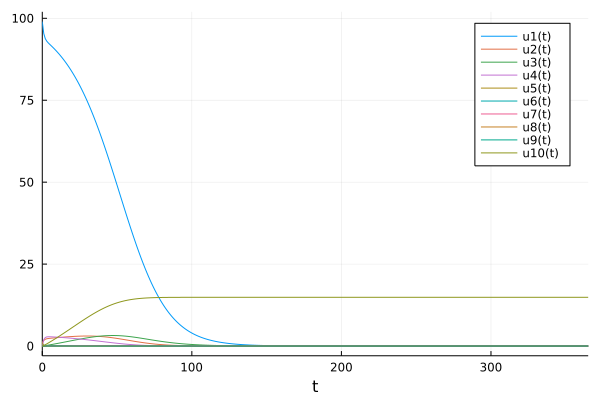

In [39]:
#AutoVern7(Rodas5())
sol2 = solve(odeprob2,alg=AutoVern7(Rodas5()),reltol=1e-12,abstol=1e-12, saveat=0:1:tmax)
plot(sol2)

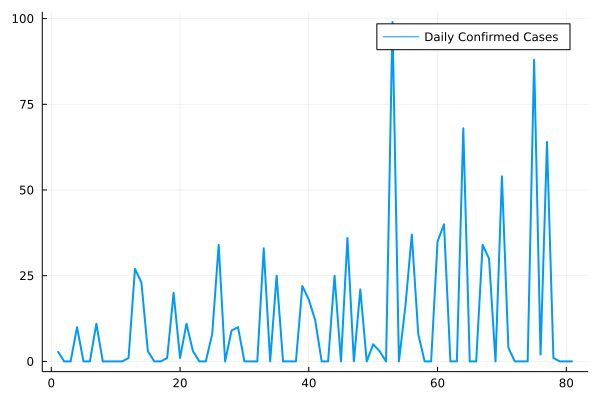

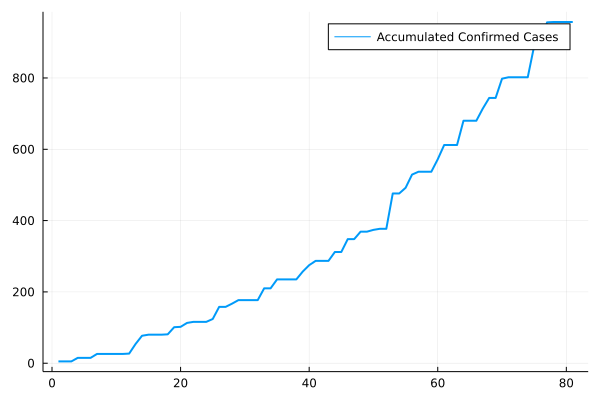

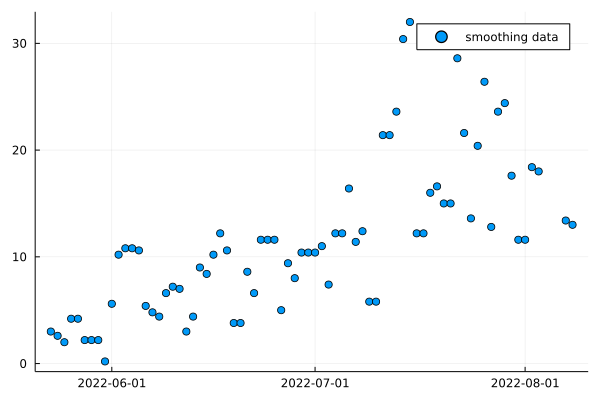

In [30]:
using DataFrames
using CSV
using Plots
source_data = DataFrame(CSV.File("./data/timeseries-country-confirmed.csv"))
country = "Canada"
data_on = source_data[source_data.Country.==country, :]
n = 1
m = length(data_on.Cumulative_cases) - 2
data_acc = data_on.Cumulative_cases[(n+1):n+m+1]
data_daily = data_on.Cumulative_cases[(n+1):n+m+1] - data_on.Cumulative_cases[n:n+m]
display(plot(data_daily, label="Daily Confirmed Cases", lw=2))
display(plot(data_acc, label="Accumulated Confirmed Cases", lw=2))
data_daily[1]

using TimeSeries
using Statistics
using Dates

dates = data_on.Date[1]:Day(1):data_on.Date[end]
smoothing = TimeArray(dates, data_on.Cases)
length(dates)
length(data_on.Cases)
data_smooth = moving(mean, smoothing, 5)
scatter(data_smooth, label="smoothing data", lw=2)

In [33]:
using DataFrames
using CSV
using Plots
using TimeSeries
using Statistics
using Dates
source_data = DataFrame(CSV.File("./data/timeseries-country-confirmed.csv"))
country = "Canada"
data_on = source_data[source_data.Country.==country, :]
cases = data_on.Cases
acc = data_on.Cumulative_cases
datatspan = findall(x -> x > 0, cases)
scatter(data_on.Date[datatspan], data_on.Cases[datatspan])

dates = data_on.Date[1]:Day(1):data_on.Date[end]
smoothing = TimeArray(dates, data_on.Cases)
length(dates)
length(data_on.Cases)
data_smooth = moving(mean, smoothing, 7)

76×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2022-05-25 to 2022-08-08
│            │ A       │
├────────────┼─────────┤
│ 2022-05-25 │ 2.1429  │
│ 2022-05-26 │ 3.4286  │
│ 2022-05-27 │ 3.0     │
│ 2022-05-28 │ 3.0     │
│ 2022-05-29 │ 3.0     │
│ 2022-05-30 │ 1.5714  │
│ 2022-05-31 │ 1.7143  │
│ 2022-06-01 │ 5.5714  │
│ 2022-06-02 │ 7.2857  │
│ 2022-06-03 │ 7.7143  │
│ 2022-06-04 │ 7.7143  │
│ ⋮          │ ⋮       │
│ 2022-07-30 │ 17.4286 │
│ 2022-07-31 │ 17.4286 │
│ 2022-08-01 │ 12.5714 │
│ 2022-08-02 │ 20.8571 │
│ 2022-08-03 │ 21.1429 │
│ 2022-08-04 │ 22.5714 │
│ 2022-08-05 │ 22.1429 │
│ 2022-08-06 │ 22.1429 │
│ 2022-08-07 │ 22.1429 │
│ 2022-08-08 │ 22.1429 │

In [5]:
using Loess
xs = 1:length(data_daily)
model = loess(xs, data_daily, span=0.5)
vs = predict(model, collect(xs))

scatter(xs, data_daily)
plot!(xs, vs, legend=false)

LoadError: MethodError: no method matching predict(::Loess.LoessModel{Float64}, ::Vector{Int64})
[0mClosest candidates are:
[0m  predict(::Loess.LoessModel{T}, [91m::T[39m) where T<:AbstractFloat at F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\Loess\dv7Ad\src\Loess.jl:138
[0m  predict(::Loess.LoessModel{T}, [91m::AbstractVector{T}[39m) where T<:AbstractFloat at F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\Loess\dv7Ad\src\Loess.jl:143
[0m  predict(::Loess.LoessModel{T}, [91m::AbstractMatrix{T}[39m) where T<:AbstractFloat at F:\Code\Julia\Julia-1.6.2\jpkgs\.julia\packages\Loess\dv7Ad\src\Loess.jl:181

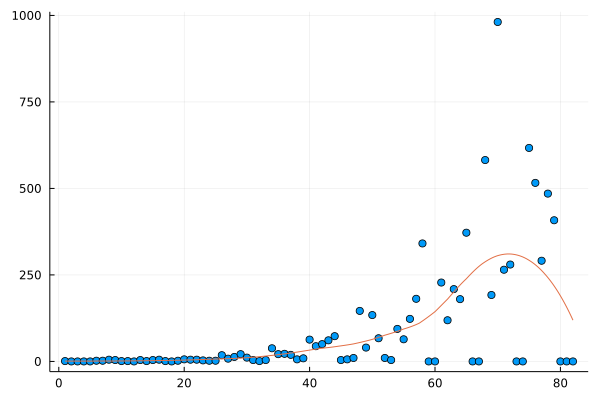

In [7]:
using Loess, Plots

xs = 1:length(data_daily)
ys = data_daily

model = loess(xs, ys, span=0.5)

us = range(extrema(xs)...; step = 0.1)
vs = predict(model, us)

scatter(xs, ys)
plot!(us, vs, legend=false)

In [ ]:
using DifferentialEquations
using Plots
using Monkeypox

@model function fitmodel(data, prob1) # data should be a Vector
    σ ~ InverseGamma(2, 3) # ~ is the tilde character
    β ~ truncated(Normal(0.4,0.5),0,1)
    γ ~ truncated(Normal(0.1,0.001),0,1)
    p = [β,γ]
    prob = remake(prob1, p = p)
    predicted = solve(prob, Vern7(), abstol=1e-12, reltol=1e-12, saveat=0:1:length(data)-1)

    for i = 1:length(predicted)
        data[i] ~ Normal(predicted[i][10], σ)
    end
end
# Online Learning
Time_learn  = 120:10:150
p_0 = [0.2,0.1]
for t_max = Time_learn
    tspan_learn = (0.0, t_max)
    prob_pred = ODEProblem(SIR_pred, u_0, tspan_learn, p_0)
    data_to_learn = data_acc[1:t_max+1]
    data_daily_to_learn = data_daily[1:t_max+1]
    function train(θ)
        prob_pred_train = remake(prob_pred, p = θ)
        Array(solve(prob_pred_train, Vern7(), abstol=1e-12, reltol=1e-12, saveat=0:1:t_max))
    end
    function loss(θ, p)
        pred = train(θ)
        mid = zeros(length(data_to_learn))
        mid[2:end] = pred[4,1:end - 1]
        pred_daily = pred[4,:] - mid
        sum(abs2, (log.(data_to_learn) .- log.(pred[4,:]))) + sum(abs2, (log.(data_daily_to_learn .+ 1) .- log.(pred_daily .+ 1))) # + 1e-5*sum(sum.(abs, params(ann)))
    end
    println(loss([0.3,0.1], p_0))
    lb = [0.0001,0.0001]
    ub = [1,1]
    using GalacticOptim:OptimizationProblem
    using Optim
    loss1 = OptimizationFunction(loss, GalacticOptim.AutoForwardDiff())
    prob = OptimizationProblem(loss1, p_0, lb=lb, ub=ub)
    sol1 = GalacticOptim.solve(prob, NelderMead(), maxiters=1000)
    p_min = sol1.u
    println(p_min)
    Turing.setadbackend(:forwarddiff)
    model = fitSIR(data_to_learn, prob_pred)
    chain = sample(model, NUTS(.45), MCMCThreads(), 2000, 3, progress=false, init_theta = sol1.u)
    @save "SIR_chain_day$t_max.bason"
    p_min = [mean(chain[:β]),mean(chain[:γ])]
    println("$t_max data parameter:",p_min)
    p_0 = p_min
    tspan_predict = (0.0, 150)
    scatter(data_to_learn,label="Training data")
    plot!(data_acc,label="Real accumulated cases")
    prob_prediction = ODEProblem(SIR_pred, u_0, tspan_predict, p_min)
    data_prediction = Array(solve(prob_prediction, Tsit5(), saveat=1))
    display(plot!(data_prediction[4,:],label="Predicted accumulated cases",xlabel  = "Days after Feb 25", title = "Ontario's Accumulated  Cases Train by $t_max days data", lw=2))
    savefig("./Results_saving/SIR_Fit_Ontario_accumulated_cases_by$t_max.png")
    mid = zeros(length(data_acc))
    mid[2:end] = data_prediction[4,1:end - 1]
    pred_daily = data_prediction[4,:] - mid
    scatter(data_daily,label="Real accumulated cases")
    display(plot!(pred_daily,label="Predicted Daily cases", xlabel  = "Days after Feb 25", title = "Ontario's Daily Cases Train by $t_max days data", lw=2))
    savefig("./Results_saving/SIR_Fit_Ontario_daily_cases_by$t_max.png")
end

In [ ]:
using DifferentialEquations, Optimization, OptimizationPolyalgorithms, OptimizationOptimJL,
      SciMLSensitivity, Zygote, Plots

function lotka_volterra!(du, u, p, t)
  x, y = u
  α, β, δ, γ = p
  du[1] = dx = α*x - β*x*y
  du[2] = dy = -δ*y + γ*x*y
end

# Initial condition
u0 = [1.0, 1.0]

# Simulation interval and intermediary points
tspan = (0.0, 10.0)
tsteps = 0.0:0.1:10.0

# LV equation parameter. p = [α, β, δ, γ]
p = [1.5, 1.0, 3.0, 1.0]

# Setup the ODE problem, then solve
prob = ODEProblem(lotka_volterra!, u0, tspan, p)
sol = solve(prob, Tsit5())

# Plot the solution
using Plots
plot(sol)
savefig("LV_ode.png")

function loss(p)
  sol = solve(prob, Tsit5(), p=p, saveat = tsteps)
  loss = sum(abs2, sol.-1)
  return loss, sol
end

callback = function (p, l, pred)
  display(l)
  plt = plot(pred, ylim = (0, 6))
  display(plt)
  # Tell Optimization.solve to not halt the optimization. If return true, then
  # optimization stops.
  return false
end

adtype = Optimization.AutoZygote()
optf = Optimization.OptimizationFunction((x,p)->loss(x), adtype)
optprob = Optimization.OptimizationProblem(optf, p)

result_ode = Optimization.solve(optprob, PolyOpt(),
                                callback = callback,
                                maxiters = 100)